# Preparation for Experiment.- Northe, Velez, Wörner


## 6.1 Exercise 1 

An AM modulated signal is to be demodulated with an AM demodulator as shown in Fig. 3.3.
The modulating signal represents a harmonic oscillation. For the modulation frequency
20 kHz and the modulation depth m = 33%, calculate the largest possible time constant $\tau$ for
which distortion-free demodulation is still possible. What is the value of the resistance R at
C = 300 pF under these conditions?

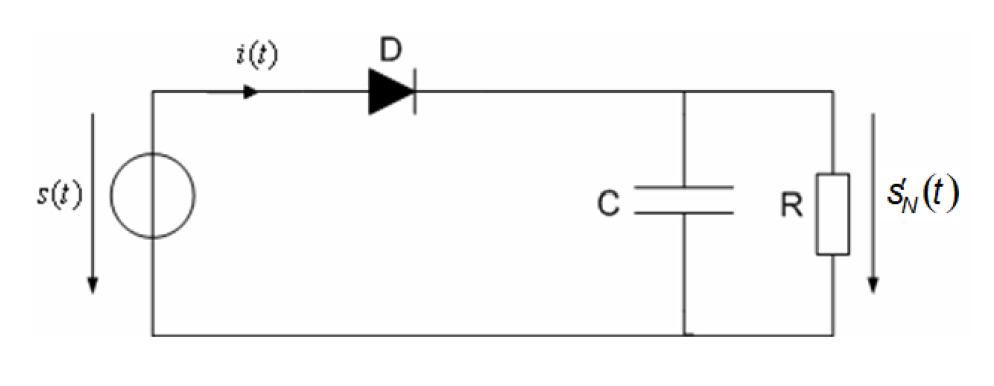

---

### Solution: Exercise 1 (AM) — Largest Time Constant for Distortion-Free Demodulation

Given:

- Modulation frequency: $f_{\text{max}} = 20 \, \text{kHz}$
- Modulation depth: $m = 0.33$
- Capacitance: $C = 300 \, \text{pF} = 300 \times 10^{-12} \, \text{F}$

From the lab manual (Eq. 3.6), the time constant $\tau$ of the envelope detector must satisfy:

$$
\frac{1}{\omega_0} \ll \tau < \frac{1}{2\pi m f_{\text{max}}}
$$

We use the upper limit:

$$
\tau_{\text{max}} = \frac{1}{2\pi m f_{\text{max}}}
$$

Substituting values:

$$
\tau_{\text{max}} = \frac{1}{2 \pi \cdot 0.33 \cdot 20 \times 10^3} = \frac{1}{41{,}469.576} \approx 24.1 \, \mu\text{s}
$$

To find the corresponding resistance $R$:

$$
\tau = R \cdot C \quad \Rightarrow \quad R = \frac{\tau}{C}
$$

Substituting:

$$
R = \frac{24.1 \times 10^{-6}}{300 \times 10^{-12}} = 80{,}333.33 \, \Omega \approx \boxed{80.3 \, \text{k}\Omega}
$$

The following script computes the value and prints the result:

In [2]:
# Given values
f_max = 20e3            # Hz
m = 0.33
C = 300e-12             # Farads

# Compute the maximum time constant tau
import math
tau_max = 1 / (2 * math.pi * m * f_max)

# Compute resistance R
R = tau_max / C

# Display results
print(f"Maximum τ: {tau_max * 1e6:.2f} µs")
print(f"Required R: {R / 1e3:.1f} kΩ")

Maximum τ: 24.11 µs
Required R: 80.4 kΩ


## 6.2 Exercise 2 

Derive the following equation (representing the transfer function of the circuit used for AM-FM conversion).
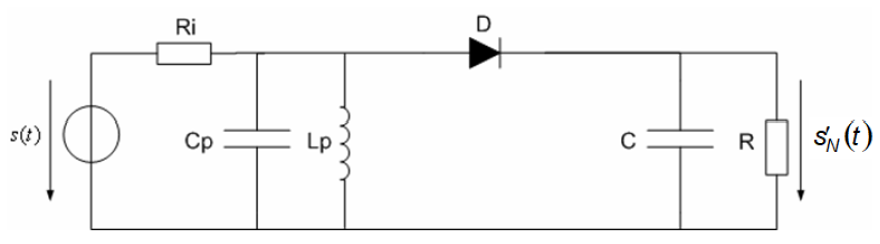

### Solution: Exercise 2 (FM) — Derivation of Equation (3.15)

We analyze the FM demodulator circuit **before the diode**, which consists of a series resistor \( R_i \) and a parallel LC tank (\( L_p \parallel C_p \)).

We aim to compute the transfer function:

$$
G(\omega) = \frac{V_{\text{out}}}{V_{\text{in}}}
$$

where:
- \( V_{\text{in}} \): FM input signal
- \( V_{\text{out}} \): voltage across the LC tank

---

### Step 1: Impedance of the LC Tank

The parallel combination is:

$$
Z_{LC} = \left( \frac{1}{j\omega C_p} \parallel j\omega L_p \right)
= \frac{ \left( \frac{1}{j\omega C_p} \right) \cdot (j\omega L_p) }{ \frac{1}{j\omega C_p} + j\omega L_p }
$$

**Numerator:**

$$
\frac{1}{j\omega C_p} \cdot j\omega L_p = \frac{L_p}{C_p}
$$

**Denominator:**

$$
\frac{1}{j\omega C_p} + j\omega L_p
= \frac{1 - \omega^2 L_p C_p}{j\omega C_p}
$$

**Therefore:**

$$
Z_{LC} = \frac{L_p / C_p}{(1 - \omega^2 L_p C_p)/(j\omega C_p)}
= \frac{j\omega L_p}{1 - \omega^2 L_p C_p}
$$

---

### Step 2: Total Series Impedance

The total impedance from input to ground is:

$$
Z_{\text{total}} = R_i + Z_{LC}
= R_i + \frac{j\omega L_p}{1 - \omega^2 L_p C_p}
$$

---

### Step 3: Voltage Divider

Using voltage division:

$$
G(\omega) = \frac{V_{\text{out}}}{V_{\text{in}}}
= \frac{Z_{LC}}{R_i + Z_{LC}}
= \frac{\dfrac{j\omega L_p}{1 - \omega^2 L_p C_p}}{R_i + \dfrac{j\omega L_p}{1 - \omega^2 L_p C_p}}
$$

Multiply numerator and denominator by \( 1 - \omega^2 L_p C_p \):

$$
G(\omega) = \frac{j\omega L_p}{j\omega L_p + R_i (1 - \omega^2 L_p C_p)}
$$

---

### Final Result

$$
\boxed{
G(\omega) = \frac{j\omega L_p}{j\omega L_p + R_i \left(1 - \omega^2 L_p C_p \right)}
}
$$

This transfer function describes how the **slope detector** converts **frequency variations (FM)** into **amplitude variations (AM)**, which can then be demodulated by the envelope detector.

## 6.3 Exercise 3 IQ

$$ f_c = 1MHz $$
$$ s(t) = 2 \left[ 1 + 0.5 \cos \left( 4\pi \times 10^3 \, \text{Hz} \cdot t + \frac{\pi}{4} \right) \right] \cos \left( 2\pi \times 10^6 \, \text{Hz} \cdot t - \sin \left( 6\pi \times 10^3 \, \text{Hz} \cdot t - \frac{\pi}{4} \right) \right)$$
$$ 0 \leq t \leq 1.5 \, \text{ms} $$

### 6.3.1 Formulas of I and Q signals after LPF

Introducing some signs:
$$ \omega_0 = 2  \pi \times 10^6Hz$$
$$ \omega_{f1} = 2 \pi \times 2 \cdot 10^3 Hz$$
$$ \omega_{f2} = 2 \pi \times 3 \cdot 10^3 Hz$$
$$ a(t) = 2 \left[ 1 + 0.5 \cos \left( 4\pi \times 10^3 \, \text{Hz} \cdot t + \frac{\pi}{4} \right) \right] $$
$$ \phi(t) = \sin \left (\omega_{f2} \cdot t - \frac{\pi}{4} \right) $$

Apply cosine subtraction identity: 
$$ s(t) = a(t) \cos \left( \omega_o \cdot t - \phi(t) \right) = a(t) \left [ \cos (\omega_0 \cdot t) \cos (\phi(t)) + \sin (\omega_0 \cdot t ) \sin ( \phi (t)) \right] $$

Now mix/multiply the bandpass signal with the signal from the LO: 
$$ s_I(t) = \frac{1}{2} s(t) \cdot \cos \left( \omega_0 t \right) $$
$$ s_Q(t) = \frac{1}{2} s(t) \cdot \sin\left( \omega_0 t \right) $$

With the following identities: <br>
$$ \cos^2 (\omega_0 t) = \frac{1 + \cos (2 \omega_0 t)}{2} $$
$$ \sin (\omega_0 t) \cos (\omega_0 t) = \frac{1}{2} \sin (2 \omega_0 t)$$

We get this euqation for one branch. We just show the I-part as it is the same for the Q-part:
\begin{align*}
s_I(t) &= \frac{1}{2} a(t) \left[ \cos(\omega_0 t) \cos(\phi(t)) + \sin(\omega_0 t) \sin(\phi(t)) \right] \cdot \cos(\omega_0 t) \\
&= \frac{1}{2} a(t) \left[ \cos(\phi(t)) \cos^2(\omega_0 t) + \sin(\phi(t)) \sin(\omega_0 t) \cos(\omega_0 t) \right] \\
&= \frac{1}{2} a(t) \left[ \cos(\phi(t)) \cdot \frac{1 + \cos(2\omega_0 t)}{2} + \sin(\phi(t)) \cdot \frac{1}{2} \sin(2\omega_0 t) \right]
\end{align*}

Now we want to get rid of the $2 \omega_0$ parts, so we have to use a LPF.

$$s_I(t) = \frac{1}{2} a(t) \left[ \cos(\phi(t)) \right]$$
$$s_Q(t) = \frac{1}{2} a(t) \left[ \sin(\phi(t)) \right]$$

Resubstitude $\phi$ and $\omega$ terms:
$$ s_I(t) = \left[ 1 + 0.5 \cos \left( 2\pi \times 2 \cdot10^3 \, \text{Hz} \cdot t + \frac{\pi}{4} \right) \right] \cdot \left[ \cos(\sin \left (2 \pi \times 3 \cdot 10^3 Hz \cdot t - \frac{\pi}{4} \right)) \right] $$
$$ s_Q(t) = \left[ 1 + 0.5 \cos \left( 2\pi \times 2 \cdot10^3 \, \text{Hz} \cdot t + \frac{\pi}{4} \right) \right] \cdot \left[ \sin(\sin \left (2 \pi \times 3 \cdot 10^3 Hz \cdot t - \frac{\pi}{4} \right)) \right] $$

### 6.3.2 Determine for the signal $s(t)$:
- Mean carrier amplitude $A_T$
- Modulation depth $m$
- AM modulation frequency $f_{N,Am}$
- Peak phase deviation $\Delta \phi$
- Modulation index $\eta$
- Peak frequency deviation $\Delta f$
- FM modulation frequency $f_{N,FM}$

$$ s(t) = 
\underbrace{2 \left[ 1 + 0.5 \cos\left(2\pi \cdot 2 \cdot 10^3 \cdot t + \frac{\pi}{4} \right) \right]}_{\text{AM envelope}}
\cdot
\cos\left(
\underbrace{2\pi \cdot 10^6 \cdot t}_{\text{Carrier}} 
- 
\underbrace{\sin\left(2\pi \cdot 3 \cdot 10^3 \cdot t - \frac{\pi}{4} \right)}_{\text{PM phase deviation}}
\right)$$

Swing: $a_{max} = 2 * (1 + 0.5) = 3 $ and $a_{min} = 2 * (1 - 0.5) = 1$ -> $\Delta a = 2$
$$ A_T = 2$$


$$m = \frac{a_n}{A_T} = \frac{1}{2} = 0.5 $$

$$f_{N,AM} = 2kHz$$ 

As an amplitude swing from $-1$ to $1$ equates to 1 rad by converting $A=-1$
$$ \Delta \phi = 1 rad $$ 

The modulation index: $$\eta = \frac{\Delta \omega}{\omega} = \frac{2 \pi \cdot 3kHz}{2 \pi \cdot 3kHz} = 1 $$ 

Therefore 
$$ \Delta f = 3kHz $$ 
$$ f_{N,FM} = 3kHz $$